## Armed bandit optimization

In [3]:
%pylab inline
import GPyOpt
from numpy.random import seed
import matplotlib.pylab as plt
from GPyOpt.util.general import samples_multidimensional_uniform
seed(1234)
        
# --- Fucntion to optimize
func  = GPyOpt.objective_examples.experiments2d.sixhumpcamel() 

bandit = samples_multidimensional_uniform([(-1,1),(-1,1)],500)

# --- Space design (two alternative ways of defining a bandit)
space = GPyOpt.Design_space(space =[{'name': 'var_1', 'type': 'bandit', 'domain': bandit}])
#space = GPyOpt.Design_space(space =[{'name': 'var_1', 'type': 'discrete', 'domain': (0.1,0.3,0.5)},
#                                    {'name': 'var_2', 'type': 'discrete', 'domain': (-1,0,1,2)}])

# --- Objective
objective = GPyOpt.core.task.SingleObjective(func.f, space)

# --- CHOOSE the model type
model = GPyOpt.models.GPModel(optimize_restarts=5,verbose=False)

# --- CHOOSE the acquisition optimizer
aquisition_optimizer = GPyOpt.optimization.AcquisitionOptimizer(space)

# --- CHOOSE the type of acquisition
acquisition = GPyOpt.acquisitions.AcquisitionLCB(model, space, optimizer=aquisition_optimizer)

# --- CHOOSE the intial design
initial_design = GPyOpt.util.stats.initial_design('random', space, 10)


# BO object
bo = GPyOpt.core.BO(model, space, objective, acquisition, initial_design)

print '-----'
print '----- Running demo. It may take a few seconds.'
print '-----'

# --- Stop conditions
max_time  = None 
max_iter  = 5
tolerance = 1e-8     # distance between two consecutive observations  

# Run the optimization                                                  
bo.run_optimization(max_iter = max_iter, max_time = max_time, eps = tolerance, verbose=False) 
#bo.plot_acquisition()

Populating the interactive namespace from numpy and matplotlib
-----
----- Running demo. It may take a few seconds.
-----


`%matplotlib` prevents importing * from pylab and numpy


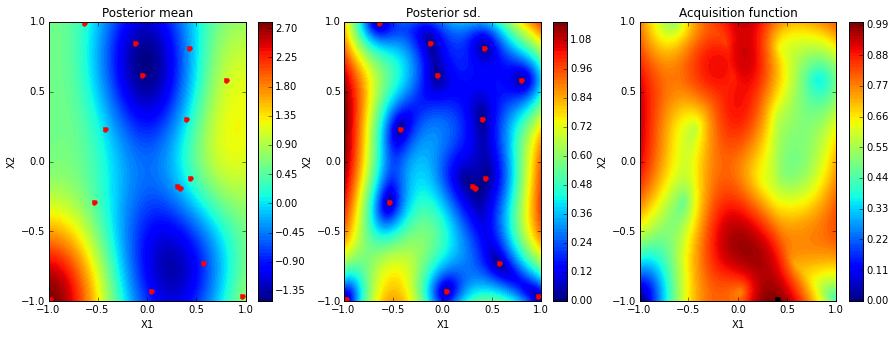

In [4]:
bo.plot_acquisition()